In [1]:
import pandas as pd
import os

In [2]:
os.chdir("..")

In [3]:
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week8\\Causal_Inference'

In [4]:
# Load the datasets
completed_orders = pd.read_csv('data/nb.csv')
delivery_requests = pd.read_csv('data/driver_locations_during_request.csv')

In [20]:
delivery_requests.shape, completed_orders.shape

((1557740, 8), (536020, 5))

In [30]:
completed_orders.nunique()

Trip ID             536020
Trip Origin         112142
Trip Destination    147520
Trip Start Time     512516
Trip End Time       513854
dtype: int64

In [5]:
# Display basic information about the datasets
completed_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [6]:
# Display basic information about the datasets
delivery_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


### Dataset Overview

**Completed Orders**
- Total Entries: 536,020

**Delivery Requests**
- Total Entries: 1,557,740

### Next Steps in EDA

**Handle Missing Values**

For the completed_orders dataset, inspect and handle missing values in the Trip Start Time and Trip End Time columns.
For the delivery_requests dataset, drop the created_at and updated_at columns as they contain no useful information.

**Convert Data Types**

Convert Trip Start Time and Trip End Time to datetime.

**Identify and Treat Outliers**

Inspect numerical columns for outliers and handle them appropriately.

**Visualize Data Distributions**

Visualize the distributions of key features such as trip duration, driver locations, and request frequencies.

### Handle Missing Values
Let's start by handling the missing values in the `Trip Start Time` and `Trip End Time` columns.

In [7]:
# Handling missing values in the completed_orders dataset
# Drop rows where Trip Start Time or Trip End Time are missing
completed_orders_cleaned = completed_orders.dropna(subset=['Trip Start Time', 'Trip End Time'])

In [8]:
# Display the number of rows before and after dropping missing values
rows_before = len(completed_orders)
rows_after = len(completed_orders_cleaned)

rows_before, rows_after

(536020, 534368)

##### We have removed 1,652 rows with missing values in the Trip Start Time and Trip End Time columns.

**Next We Convert Data Types**

Convert Trip Start Time and Trip End Time to datetime format.

In [9]:
# Convert Trip Start Time and Trip End Time to datetime format
completed_orders_cleaned['Trip Start Time'] = pd.to_datetime(completed_orders_cleaned['Trip Start Time'])
completed_orders_cleaned['Trip End Time'] = pd.to_datetime(completed_orders_cleaned['Trip End Time'])

# Confirm the data types have been converted
completed_orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534368 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           534368 non-null  int64         
 1   Trip Origin       534368 non-null  object        
 2   Trip Destination  534368 non-null  object        
 3   Trip Start Time   534368 non-null  datetime64[ns]
 4   Trip End Time     534368 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 24.5+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_16572\2202148333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_cleaned['Trip Start Time'] = pd.to_datetime(completed_orders_cleaned['Trip Start Time'])
C:\Users\user\AppData\Local\Temp\ipykernel_16572\2202148333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_cleaned['Trip End Time'] = pd.to_datetime(completed_orders_cleaned['Trip End Time'])


In [10]:
completed_orders.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [19]:
delivery_requests.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [11]:
delivery_requests.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [29]:
# show all the rows that order id is 392001	and driver action is rejected and accepted
completed_orders[(completed_orders['Trip ID'] == 392001)]

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [ ]:
# show all the rows that order id is 392001	and driver action is rejected and accepted
delivery_requests[(delivery_requests['order_id'] == 392001)]

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN
7,8,392001,243906,rejected,6.591838,3.276124,NaN,NaN
8,9,392001,226949,rejected,6.610941,3.276126,NaN,NaN
9,10,392001,243769,rejected,6.617199,3.271723,NaN,NaN


In [22]:
# show all the rows that order id is 392001	and driver action is accepted
delivery_requests[(delivery_requests['order_id'] == 392001) & (delivery_requests['driver_action'] == 'accepted')]

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN


In [25]:
# show all the rows that order id is 392001	and driver action is rejected
delivery_requests[(delivery_requests['order_id'] == 392001) & (delivery_requests['driver_action'] == 'rejected')]

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN
7,8,392001,243906,rejected,6.591838,3.276124,NaN,NaN
8,9,392001,226949,rejected,6.610941,3.276126,NaN,NaN
9,10,392001,243769,rejected,6.617199,3.271723,NaN,NaN


**Next We Inspect and Treat Outliers**

Identify outliers in numerical columns (e.g., trip durations).

C:\Users\user\AppData\Local\Temp\ipykernel_16572\1025384685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_cleaned['Trip Duration'] = (completed_orders_cleaned['Trip End Time'] - completed_orders_cleaned['Trip Start Time']).dt.total_seconds() / 60


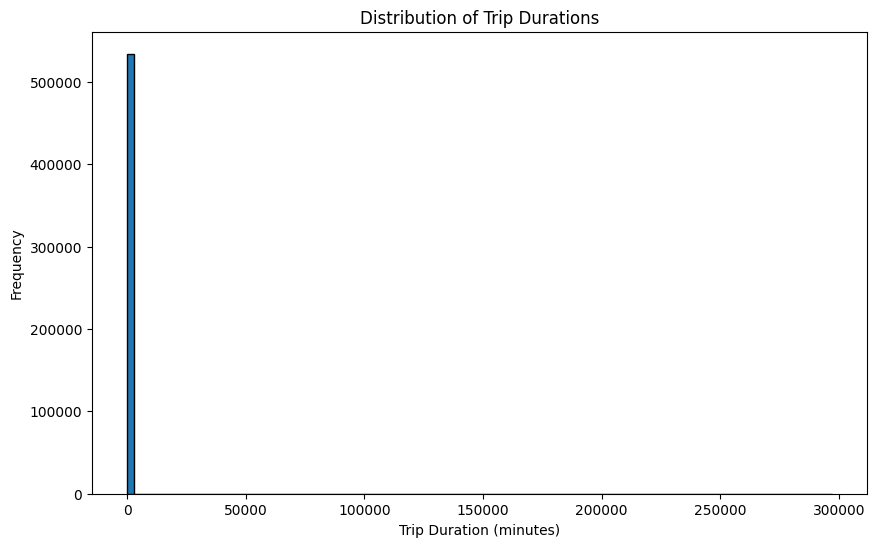

count    534368.000000
mean         81.606611
std         797.344447
min           0.000000
25%          33.683333
50%          52.950000
75%          80.133333
max      296895.100000
Name: Trip Duration, dtype: float64

In [12]:
# Calculate trip duration in minutes
completed_orders_cleaned['Trip Duration'] = (completed_orders_cleaned['Trip End Time'] - completed_orders_cleaned['Trip Start Time']).dt.total_seconds() / 60

# Visualize the distribution of trip durations to identify outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(completed_orders_cleaned['Trip Duration'], bins=100, edgecolor='k')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

# Calculate basic statistics for trip durations
trip_duration_stats = completed_orders_cleaned['Trip Duration'].describe()
trip_duration_stats

**Observations**
The maximum trip duration seems unusually high, indicating potential outliers.
The standard deviation is also very high, suggesting significant variability in trip durations.

### Next Steps Identify and Handle Outliers
Remove or investigate trips with excessively high durations.
Consider trips with durations significantly above the 75th percentile as potential outliers.

In [13]:
delivery_requests['driver_action'].isna().sum()

0

In [14]:
delivery_requests['driver_action'].unique()

array(['accepted', 'rejected'], dtype=object)

In [15]:
delivery_requests['driver_action'].value_counts()

driver_action
rejected    1531837
accepted      25903
Name: count, dtype: int64

In [16]:
delivery_requests['driver_action'].describe()

count      1557740
unique           2
top       rejected
freq       1531837
Name: driver_action, dtype: object

In [17]:
# percentage of rejected orders
delivery_requests['driver_action'].describe()['freq'] * 100 /delivery_requests.shape[0]

98.33714227021197

In [18]:
# percentage of rejected orders
delivery_requests['driver_action'].value_counts()['accepted'] * 100 /delivery_requests.shape[0]

1.6628577297880263

In [31]:
# Calculate the Interquartile Range (IQR)
Q1 = completed_orders_cleaned['Trip Duration'].quantile(0.25)
Q3 = completed_orders_cleaned['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
completed_orders_no_outliers = completed_orders_cleaned[
    (completed_orders_cleaned['Trip Duration'] >= lower_bound) &
    (completed_orders_cleaned['Trip Duration'] <= upper_bound)
]

# Display the number of rows before and after removing outliers
rows_after_outlier_removal = len(completed_orders_no_outliers)

lower_bound, upper_bound, rows_after_outlier_removal


(-35.99166666666668, 149.80833333333334, 505323)

In [59]:
# rename the column Trip Duration to Trip Duration(minutes)
completed_orders_no_outliers.rename(columns={'Trip Duration': 'Trip Duration(minutes)'}, inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Outlier Thresholds and Data Cleaning**
Lower Bound: -35.99 minutes (This indicates that there are no trip durations significantly below zero, so we only need to consider the upper bound.)
Upper Bound: 149.81 minutes

### Feature Engineering

Create new features based on time and location, such as trip duration, day of the week, hour of the day, and whether the trip occurred during a holiday or special event.
Compute distances, driving speed, and other relevant metrics.

In [32]:
# Feature Engineering
# Create new features: Day of the week, Hour of the day, and Trip Duration in minutes
completed_orders_no_outliers['Day of Week'] = completed_orders_no_outliers['Trip Start Time'].dt.dayofweek
completed_orders_no_outliers['Hour of Day'] = completed_orders_no_outliers['Trip Start Time'].dt.hour

# Display the first few rows to confirm the new features
new_features_sample = completed_orders_no_outliers[['Trip ID', 'Trip Start Time', 'Trip End Time', 'Trip Duration', 'Day of Week', 'Hour of Day']].head()

new_features_sample


C:\Users\user\AppData\Local\Temp\ipykernel_16572\3920781419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_no_outliers['Day of Week'] = completed_orders_no_outliers['Trip Start Time'].dt.dayofweek
C:\Users\user\AppData\Local\Temp\ipykernel_16572\3920781419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_no_outliers['Hour of Day'] = completed_orders_no_outliers['Trip Start Time'].dt.hour


,Trip ID,Trip Start Time,Trip End Time,Trip Duration,Day of Week,Hour of Day
0,391996,2021-07-01 07:28:04,2021-07-01 07:29:37,1.550000,3,7
1,391997,2021-07-01 06:38:04,2021-07-01 07:07:28,29.400000,3,6
2,391998,2021-07-01 06:21:02,2021-07-01 07:02:23,41.350000,3,6
3,391999,2021-07-01 07:16:07,2021-07-01 07:29:42,13.583333,3,7
4,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,9


- **Day of the Week** Numeric representation of the day (0 = Monday, 6 = Sunday).
- **Hour of the Day** Hour of the day when the trip started.

### Distance Calculation

Compute distances between trip origin and destination using latitude and longitude coordinates. (Note: We may need additional data for latitude and longitude of trip origins and destinations if not already included.)

In [33]:
# Inspect the contents of the 'Trip Origin' and 'Trip Destination' columns
trip_origins_sample = completed_orders_no_outliers['Trip Origin'].head(10)
trip_destinations_sample = completed_orders_no_outliers['Trip Destination'].head(10)

trip_origins_sample, trip_destinations_sample


(0    6.508813001668548,3.37740316890347
 1                   6.4316714,3.4555375
 2           6.631679399999999,3.3388976
 3           6.572757200000001,3.3677082
 4                   6.6010417,3.2766339
 5           6.565087699999999,3.3844415
 6                   6.6636484,3.3082058
 7                   6.4308171,3.4341552
 8           6.499156300000001,3.3585173
 9           6.535043099999999,3.3316238
 Name: Trip Origin, dtype: object,
 0        6.650969799999999,3.3450307
 1    6.4280814653326,3.4721885847586
 2        6.508324099999999,3.3590397
 3        6.584881099999999,3.3614073
 4                6.4501069,3.3916154
 5        6.499696300000001,3.3509075
 6                 6.6185421,3.301634
 7        6.435460000000001,3.4846547
 8                6.4280911,3.5157172
 9        6.500039999999999,3.3248596
 Name: Trip Destination, dtype: object)

In [34]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Split latitude and longitude for origins and destinations
completed_orders_no_outliers[['Origin Lat', 'Origin Lon']] = completed_orders_no_outliers['Trip Origin'].str.split(',', expand=True).astype(float)
completed_orders_no_outliers[['Destination Lat', 'Destination Lon']] = completed_orders_no_outliers['Trip Destination'].str.split(',', expand=True).astype(float)

# Calculate the distance between origins and destinations
completed_orders_no_outliers['Trip Distance (km)'] = haversine_distance(
    completed_orders_no_outliers['Origin Lat'], completed_orders_no_outliers['Origin Lon'],
    completed_orders_no_outliers['Destination Lat'], completed_orders_no_outliers['Destination Lon']
)

# Display the first few rows to confirm the new feature
distance_sample = completed_orders_no_outliers[['Trip ID', 'Origin Lat', 'Origin Lon', 'Destination Lat', 'Destination Lon', 'Trip Distance (km)']].head()

distance_sample


C:\Users\user\AppData\Local\Temp\ipykernel_16572\3681506708.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_no_outliers[['Origin Lat', 'Origin Lon']] = completed_orders_no_outliers['Trip Origin'].str.split(',', expand=True).astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_16572\3681506708.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_no_outliers[['Origin Lat', 'Origin Lon']] = completed_orders_no_outliers['Trip Origin'].str.split(',', expand=True).astype

,Trip ID,Origin Lat,Origin Lon,Destination Lat,Destination Lon,Trip Distance (km)
0,391996,6.508813,3.377403,6.650970,3.345031,16.206549
1,391997,6.431671,3.455538,6.428081,3.472189,1.882675
2,391998,6.631679,3.338898,6.508324,3.359040,13.895773
3,391999,6.572757,3.367708,6.584881,3.361407,1.517186
4,392001,6.601042,3.276634,6.450107,3.391615,21.048262


In [57]:
completed_orders_no_outliers.head(3)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip Duration,Day of Week,Hour of Day,Origin Lat,Origin Lon,Destination Lat,Destination Lon,Trip Distance (km)
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,1.55,3,7,6.508813,3.377403,6.650970,3.345031,16.206549
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.40,3,6,6.431671,3.455538,6.428081,3.472189,1.882675
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.35,3,6,6.631679,3.338898,6.508324,3.359040,13.895773


In [64]:
completed_orders_no_outliers['Origin Lat'][0].dtype, completed_orders_no_outliers['Origin Lon'][0].dtype

(dtype('float64'), dtype('float64'))

In [73]:
# Import module
from geopy.geocoders import Photon
geolocator = Photon(user_agent="measurements")
 
# Assign Latitude & Longitude
Latitude = completed_orders_no_outliers['Origin Lat'][0]
Longitude = completed_orders_no_outliers['Origin Lon'][0]
 
# Displaying Latitude and Longitude
print("Latitude: ", Latitude)
print("Longitude: ", Longitude)
 
# Get location with geocode
location = geolocator.reverse(f"{Latitude},{Longitude}")
 
# Display location
print("\nLocation of the given Latitude and Longitude:")
print(location)

Latitude:  6.508813001668548
Longitude:  3.37740316890347

Location of the given Latitude and Longitude:
Little Road, 100231, Lagos, Nigeria


In [77]:
# Import module
from geopy.geocoders import Photon
geolocator = Photon(user_agent="measurements")
 
# Assign location
location_coordinates = completed_orders_no_outliers['Trip Origin'][0]
 
# Displaying Location
print("Location: ", location_coordinates)
 
# Get location with geocode
location_name = geolocator.reverse(location_coordinates)
 
# Display location
print("\nLocation of the given Latitude and Longitude:")
print(location_name)

Location:  6.508813001668548,3.37740316890347

Location of the given Latitude and Longitude:
Little Road, 100231, Lagos, Nigeria


In [80]:
completed_orders_no_outliers['Trip Origin'].isna().sum()

0

In [94]:
type(completed_orders_no_outliers['Trip Origin'])

pandas.core.series.Series

In [83]:
completed_orders_no_outliers['Location Name'] = completed_orders_no_outliers['Trip Origin'].apply(lambda x: geolocator.reverse(x, timeout=20))

GeocoderTimedOut: Service timed out

In [ ]:
import pandas as pd
from geopy.geocoders import Photon

# Get the unique values of the "Trip Origin" column
unique_values = completed_orders_no_outliers['Trip Origin'].unique()

print("The unique values in the 'Trip Origin' column are: ",len(unique_values))
# Create an empty list to store the reverse geocoded values
reverse_geocoded_values = []

# Create a geocoder object
geolocator = Photon(user_agent="measurements")

# Iterate over each unique value and perform reverse geocoding
i = 1
for value in unique_values:
    location = geolocator.reverse(value)
    if location:
        reverse_geocoded_values.append(location.address)
        print(i, ". Address is :: ", location.address)
    else:
        reverse_geocoded_values.append(None)
        print(i, ". Address Not Found :: ", value)
    i = i + 1
# Create a new column in the DataFrame with the reverse geocoded values
completed_orders_no_outliers['Location Name'] = pd.Series(reverse_geocoded_values)

In [91]:
completed_orders_no_outliers.nunique()

Trip ID                   505323
Trip Origin               108471
Trip Destination          142333
Trip Start Time           485608
Trip End Time             485500
Trip Duration(minutes)      8985
Day of Week                    7
Hour of Day                   24
Origin Lat                106695
Origin Lon                103909
Destination Lat           139466
Destination Lon           135779
Trip Distance (km)        442246
dtype: int64

In [72]:
from geopy.geocoders import Photon
geolocator = Photon(user_agent="measurements")

location = geolocator.geocode("175 5th Avenue NYC")
print(location)

Flatiron Building, 175, 5th Avenue, 10010, 5th Avenue, New York, NY, United States


In [74]:
completed_orders_no_outliers['Trip Origin'][0]

'6.508813001668548,3.37740316890347'

In [50]:
from pandas import Timestamp


m: Timestamp = completed_orders_no_outliers['Trip Start Time'][0]
m.to_pydatetime()

datetime.datetime(2021, 7, 1, 7, 28, 4)

In [117]:
from meteostat import Point, Daily

# Define location for Lagos, Nigeria
lagos = Point(6.5244, 3.3792)

# Define time range for the data
start_date = completed_orders_no_outliers['Trip Start Time'].min().to_pydatetime()
# decrease one day from the start date
start_date = start_date - pd.Timedelta(days=1)
end_date = completed_orders_no_outliers['Trip Start Time'].max().to_pydatetime()

In [119]:
start_date, end_date

(datetime.datetime(2021, 6, 30, 6, 21, 2),
 datetime.datetime(2022, 6, 13, 10, 4, 28))

In [120]:
# Get daily weather data for Lagos
weather_data = Daily(lagos, start_date, end_date)
weather_data = weather_data.fetch()

# Display the first few rows of the weather data
weather_data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-07-01,27.8,24.0,33.0,0.0,NaN,253.0,10.1,NaN,1014.7,NaN
2021-07-02,27.5,24.9,31.2,NaN,NaN,248.0,9.5,NaN,1014.0,NaN
2021-07-03,25.9,23.0,29.5,NaN,NaN,258.0,11.0,NaN,1014.6,NaN
2021-07-04,25.7,22.0,31.0,NaN,NaN,257.0,8.8,NaN,1015.5,NaN
2021-07-05,27.6,24.0,32.0,NaN,NaN,242.0,8.8,NaN,1015.6,NaN


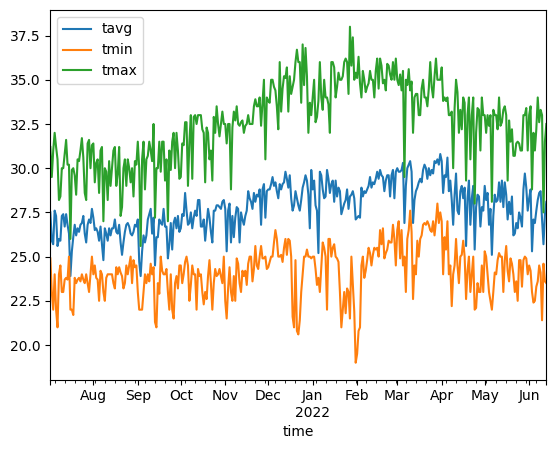

In [61]:
# Plot line chart including average, minimum and maximum temperature
weather_data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [108]:
# Save the weather data to a CSV file
weather_data.to_csv('data/weather_data_lagos.csv')

In [121]:
# Merge the weather data with trip data on the date
completed_orders_no_outliers['Trip Date'] = completed_orders_no_outliers['Trip Start Time'].dt.date
weather_data['date'] = weather_data.index.date

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [122]:
weather_data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,date
time,,,,,,,,,,,
2021-07-01,27.8,24.0,33.0,0.0,NaN,253.0,10.1,NaN,1014.7,NaN,2021-07-01
2021-07-02,27.5,24.9,31.2,NaN,NaN,248.0,9.5,NaN,1014.0,NaN,2021-07-02
2021-07-03,25.9,23.0,29.5,NaN,NaN,258.0,11.0,NaN,1014.6,NaN,2021-07-03
2021-07-04,25.7,22.0,31.0,NaN,NaN,257.0,8.8,NaN,1015.5,NaN,2021-07-04
2021-07-05,27.6,24.0,32.0,NaN,NaN,242.0,8.8,NaN,1015.6,NaN,2021-07-05


In [126]:
# Merge on the 'Trip Date' and 'date' columns
merged_data = pd.merge(completed_orders_no_outliers, weather_data, left_on='Trip Date', right_on='date', how='left')

# Display the first few rows of the merged data
merged_data.head(1)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip Duration(minutes),Day of Week,Hour of Day,Origin Lat,Origin Lon,...,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,date
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,1.55,3,7,6.508813,3.377403,...,24.0,33.0,0.0,NaN,253.0,10.1,NaN,1014.7,NaN,2021-07-01


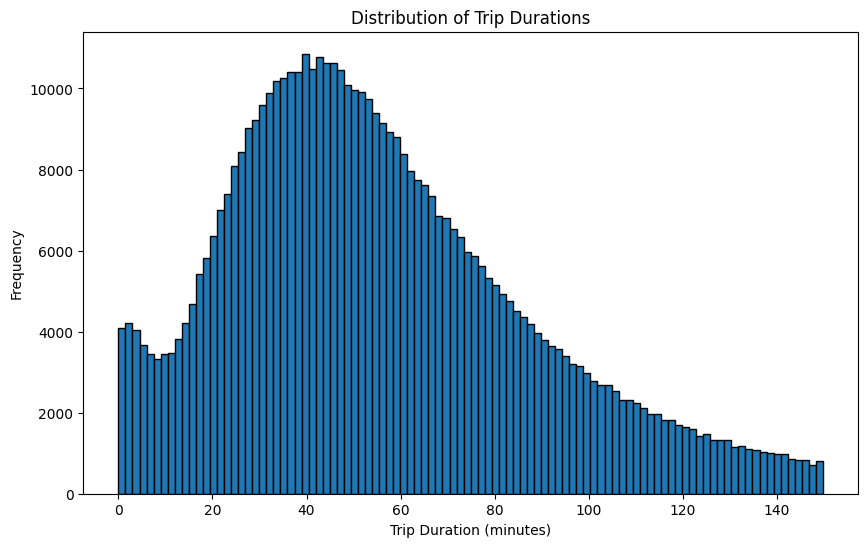

In [127]:
import matplotlib.pyplot as plt

# Distribution of Trip Durations
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Trip Duration(minutes)'], bins=100, edgecolor='k')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()


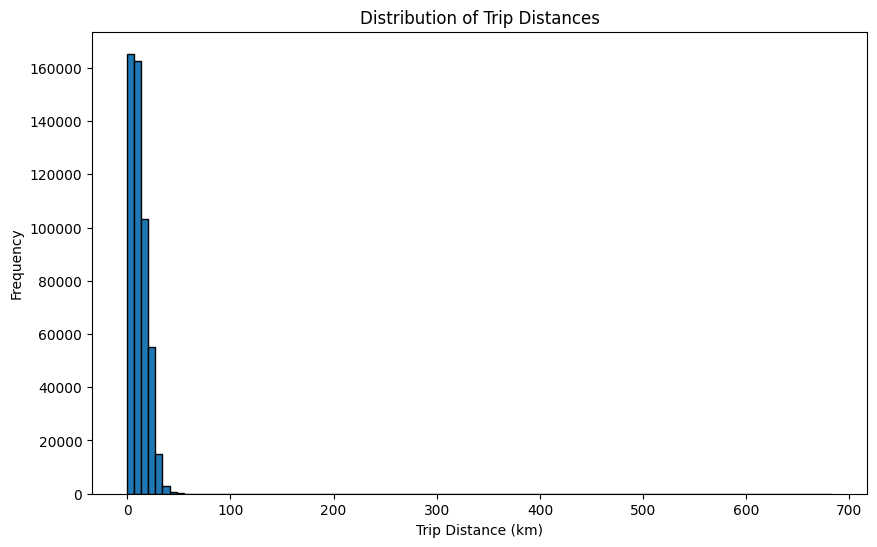

In [128]:
# Distribution of Trip Distances
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Trip Distance (km)'], bins=100, edgecolor='k')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.show()


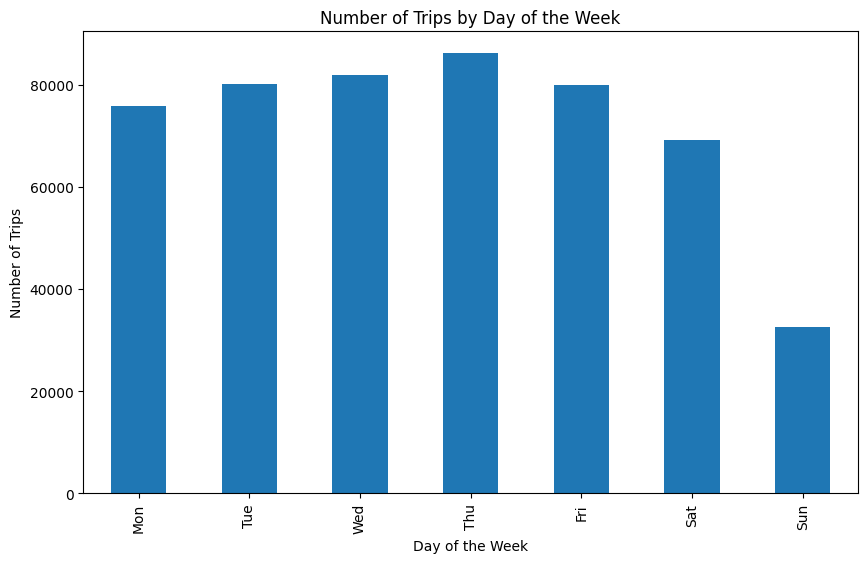

In [129]:
# Trips by Day of the Week
plt.figure(figsize=(10, 6))
merged_data['Day of Week'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


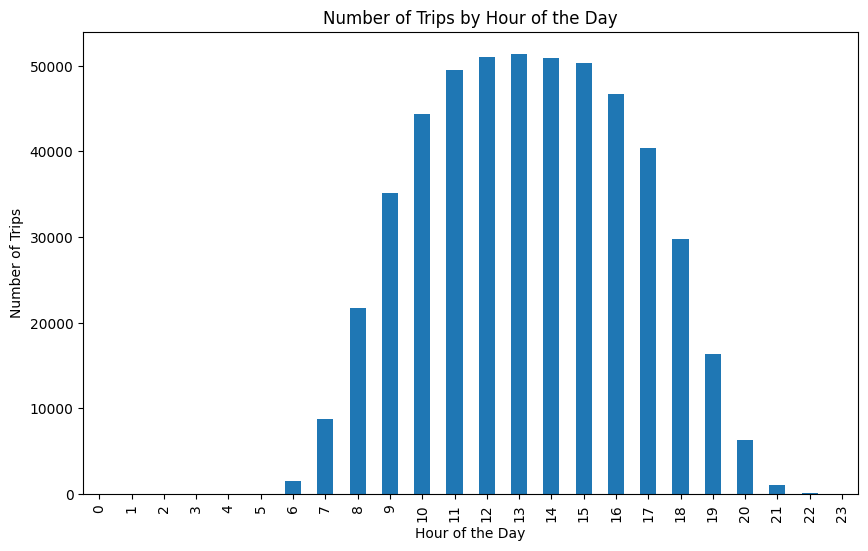

In [130]:
# Trips by Hour of the Day
plt.figure(figsize=(10, 6))
merged_data['Hour of Day'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour of the Day')
plt.show()


In [132]:
%pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: '6.508813001668548,3.37740316890347'

<Figure size 1200x800 with 0 Axes>